# Importation des données

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

tab_final = pd.read_csv("/Users/louise/Documents/GitHub/projetpython/1. Rassemblement des données/tab_final.csv", ";")

# Description des députés selon les variables de contrôle

[[Text(0, 0, 'Women'), Text(1, 0, 'Men')]]

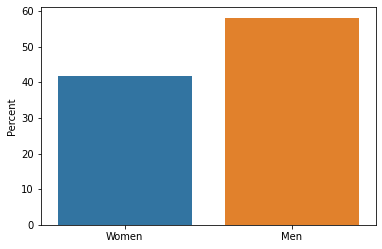

In [2]:
ax = sns.barplot(x="sexe", y="sexe", data=tab_final, estimator=lambda x: len(x) / len(tab_final) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="")
ax.set(xticklabels=["Women", "Men"])
ax

<AxesSubplot:ylabel='Percent'>

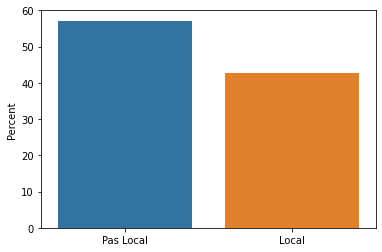

In [12]:
ax = sns.barplot(x="ancrage_local", y="ancrage_local", data=tab_final, estimator=lambda x: len(x) / len(tab_final) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="")
ax.set(xticklabels=["Pas Local", "Local"])
ax

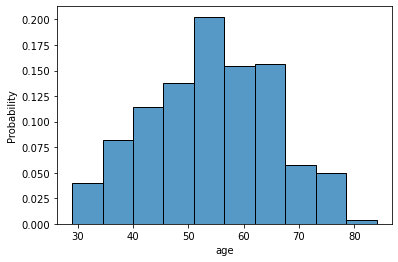

In [4]:
age_depute = sns.histplot(data = tab_final, x = "age", stat='probability', bins = 10 )

<AxesSubplot:ylabel='Percent'>

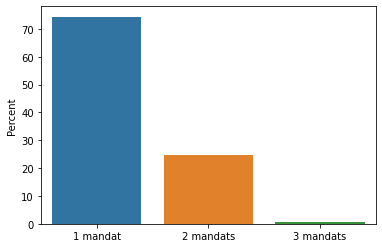

In [14]:
ax = sns.barplot(x="nb_mandats", y="nb_mandats", data=tab_final, estimator=lambda x: len(x) / len(tab_final) * 100)
ax.set(ylabel="Percent")
ax.set(xlabel="")
ax.set(xticklabels=["1 mandat", "2 mandats", "3 mandats"])
ax

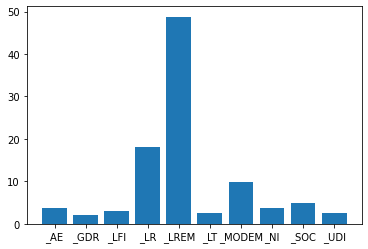

In [24]:
names = [ '_AE', '_GDR', '_LFI', '_LR', '_LREM', '_LT', '_MODEM', '_NI', '_SOC', '_UDI']
values=[]  
for i in names : 
    values.append(tab_final[i].sum()/523*100)
sum(values) #test
plt.bar(names, values)
plt.show()

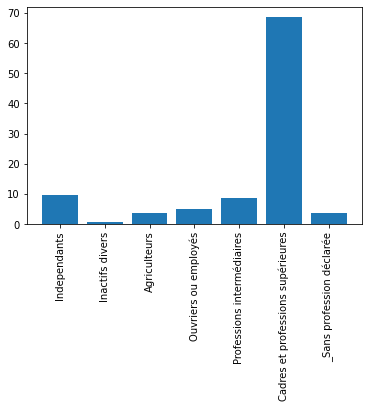

In [35]:
agri = ['_Agriculteurs exploitants', '_Anciens agriculteurs exploitants', '_Ouvriers agricoles']
tab_final['Agriculteurs'] = tab_final[agri].any(axis=1).replace([True, False], [1, 0])
inde = ["_Anciens artisans, commerçants, chefs d'entreprise", "_Chefs d'entreprise de 10 salariés ou plus", '_Commerçants et assimilés', '_Artisans']
tab_final['Independants'] = tab_final[inde].any(axis=1).replace([True, False], [1, 0])
ouv_emp = ['_Anciens employés et ouvriers', '_Contremaîtres, agents de maîtrise', "_Employés administratifs d'entreprise", '_Employés de commerce', '_Ouvriers qualifiés', '_Employés de la fonction publique']
tab_final['Ouvriers ou employés'] = tab_final[ouv_emp].any(axis=1).replace([True, False], [1, 0])
prof_inter = ['_Anciens cadres et professions intermédiaires', '_Professions intermédiaires administratives et commerciales des entreprises', "_Professions intermédiaires de l'enseignement, de la santé, de la fonction publique et assimilés"]
tab_final['Professions intermédiaires'] = tab_final[prof_inter].any(axis=1).replace([True, False], [1, 0])
cadre_sup = ['_Professions libérales et assimilés', "_Cadres d'entreprise", '_Cadres de la fonction publique, professions intellectuelles et  artistiques']
tab_final['Cadres et professions supérieures'] = tab_final[cadre_sup].any(axis=1).replace([True, False], [1, 0])
tab_final['Inactifs divers'] = tab_final['_Inactifs divers (autres que retraités)']
                                         
names = ["Independants", 'Inactifs divers', "Agriculteurs", "Ouvriers ou employés", "Professions intermédiaires", "Cadres et professions supérieures"]
tab_final['_Sans profession déclarée'] = tab_final[names].any(axis=1).replace([True, False], [0, 1])
names.append('_Sans profession déclarée')
tab_final[names].sum().sum()

values=[]  
for i in names : 
     values.append(tab_final[i].sum()/523*100)
sum(values)


plt.bar(names, values)
plt.xticks(rotation=90)
plt.show()


# Mise en évidence des corrélations entre les variables

### Corrélation entre les variables reliées à Twitter

,Tweets,Followers,Following,Listed,Replies/100derniers,Tweets with @mentions/100derniers,Tweets with #hashtags/100derniers,Retweets/100,Tweets with links/100derniers,Tweets with media/100derniers
Tweets,1.000000,0.319849,0.423264,0.513218,0.194556,0.201158,0.044496,0.124382,0.048909,0.110475
Followers,0.319849,1.000000,0.138421,0.918910,0.086932,-0.088492,-0.015684,-0.097216,0.131294,0.011743
Following,0.423264,0.138421,1.000000,0.251771,0.098489,0.225057,0.141191,0.120377,0.138927,0.081158
Listed,0.513218,0.918910,0.251771,1.000000,0.123093,-0.027595,0.019716,-0.060208,0.182596,0.061548
Replies/100derniers,0.194556,0.086932,0.098489,0.123093,1.000000,0.222728,-0.119231,-0.134667,0.146494,-0.027474
Tweets with @mentions/100derniers,0.201158,-0.088492,0.225057,-0.027595,0.222728,1.000000,0.341953,0.840530,-0.191464,0.147618
Tweets with #hashtags/100derniers,0.044496,-0.015684,0.141191,0.019716,-0.119231,0.341953,1.000000,0.214026,0.312615,0.023275
Retweets/100,0.124382,-0.097216,0.120377,-0.060208,-0.134667,0.840530,0.214026,1.000000,-0.520090,0.158882
Tweets with links/100derniers,0.048909,0.131294,0.138927,0.182596,0.146494,-0.191464,0.312615,-0.520090,1.000000,-0.028071
Tweets with media/100derniers,0.110475,0.011743,0.081158,0.061548,-0.027474,0.147618,0.023275,0.158882,-0.028071,1.000000


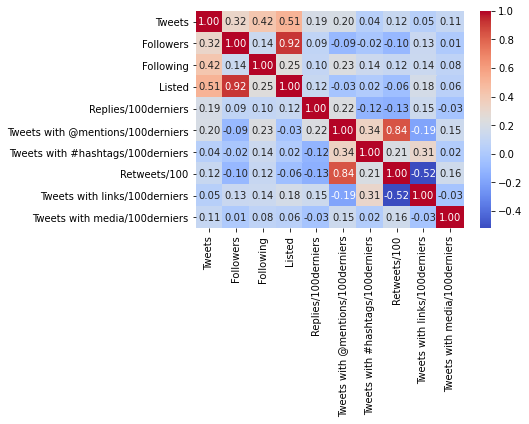

In [40]:
df = tab_final.loc[:,[ 'Tweets',
 'Followers',
 'Following',
 'Listed',
 'Replies/100derniers',
 'Tweets with @mentions/100derniers',
 'Tweets with #hashtags/100derniers',
 'Retweets/100',
 'Tweets with links/100derniers',
 'Tweets with media/100derniers']]

sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f") 
df.corr()

### Corrélation entre le parti et l'ancrage 

,_AE,_GDR,_LFI,_LR,_LREM,_LT,_MODEM,_NI,_SOC,_UDI,age,ancrage_local,sexe
_AE,1.000000,-0.029228,-0.035423,-0.093944,-0.194506,-0.033070,-0.066256,-0.039761,-0.045608,-0.033070,-0.110579,-0.031552,0.027782
_GDR,-0.029228,1.000000,-0.026039,-0.069056,-0.142976,-0.024309,-0.048703,-0.029228,-0.033525,-0.024309,0.080352,0.034703,0.070389
_LFI,-0.035423,-0.026039,1.000000,-0.083694,-0.173284,-0.029462,-0.059027,-0.035423,-0.040632,-0.029462,-0.090112,-0.086447,-0.006756
_LR,-0.093944,-0.069056,-0.083694,1.000000,-0.459560,-0.078135,-0.156542,-0.093944,-0.107758,-0.078135,0.125298,0.123389,0.138520
_LREM,-0.194506,-0.142976,-0.173284,-0.459560,1.000000,-0.161774,-0.324111,-0.194506,-0.223106,-0.161774,-0.177977,-0.063514,-0.156792
_LT,-0.033070,-0.024309,-0.029462,-0.078135,-0.161774,1.000000,-0.055106,-0.033070,-0.037933,-0.027505,0.036199,0.047971,0.044717
_MODEM,-0.066256,-0.048703,-0.059027,-0.156542,-0.324111,-0.055106,1.000000,-0.066256,-0.075998,-0.055106,0.087901,-0.042245,0.035933
_NI,-0.039761,-0.029228,-0.035423,-0.093944,-0.194506,-0.033070,-0.066256,1.000000,-0.045608,-0.033070,-0.012678,-0.051700,-0.032844
_SOC,-0.045608,-0.033525,-0.040632,-0.107758,-0.223106,-0.037933,-0.075998,-0.045608,1.000000,-0.037933,0.112417,0.015364,-0.037674
_UDI,-0.033070,-0.024309,-0.029462,-0.078135,-0.161774,-0.027505,-0.055106,-0.033070,-0.037933,1.000000,0.072483,0.071911,0.044717


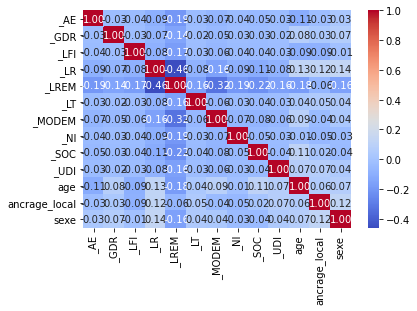

In [41]:
df1 = tab_final.loc[:,[ 
 '_AE',
 '_GDR',
 '_LFI',
 '_LR',
 '_LREM',
 '_LT',
 '_MODEM',
 '_NI',
 '_SOC',
 '_UDI', 'age', "ancrage_local", "sexe"]]

sns.heatmap(df1.corr(), cmap='coolwarm', annot=True, fmt=".2f")
df1.corr()

### Corrélation entre la PCS et l'ancrage

,Independants,Inactifs divers,Agriculteurs,Ouvriers ou employés,Professions intermédiaires,Cadres et professions supérieures,_Sans profession déclarée,age,ancrage_local,sexe
Independants,1.000000,-0.024695,-0.063127,-0.075857,-0.099758,-0.481038,-0.064831,0.016820,0.007689,0.051890
Inactifs divers,-0.024695,1.000000,-0.014748,-0.017721,-0.023305,-0.112379,-0.015146,-0.034252,0.036589,0.013149
Agriculteurs,-0.063127,-0.014748,1.000000,-0.045300,-0.059574,-0.287268,-0.038716,0.125101,0.183020,0.102656
Ouvriers ou employés,-0.075857,-0.017721,-0.045300,1.000000,-0.071587,-0.345196,-0.046523,-0.077189,0.007613,-0.047188
Professions intermédiaires,-0.099758,-0.023305,-0.059574,-0.071587,1.000000,-0.453960,-0.061182,0.105492,-0.045105,-0.057449
Cadres et professions supérieures,-0.481038,-0.112379,-0.287268,-0.345196,-0.453960,1.000000,-0.295023,-0.085044,-0.072951,0.036146
_Sans profession déclarée,-0.064831,-0.015146,-0.038716,-0.046523,-0.061182,-0.295023,1.000000,0.006184,0.028894,-0.133889
age,0.016820,-0.034252,0.125101,-0.077189,0.105492,-0.085044,0.006184,1.000000,0.057337,0.073060
ancrage_local,0.007689,0.036589,0.183020,0.007613,-0.045105,-0.072951,0.028894,0.057337,1.000000,0.123728
sexe,0.051890,0.013149,0.102656,-0.047188,-0.057449,0.036146,-0.133889,0.073060,0.123728,1.000000


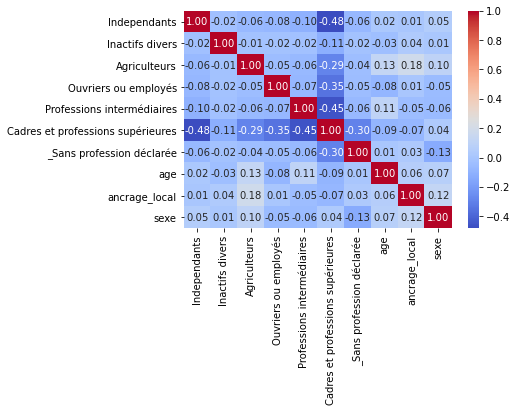

In [44]:
df2 = tab_final.loc[:,[ "Independants", 'Inactifs divers', "Agriculteurs", "Ouvriers ou employés", "Professions intermédiaires", "Cadres et professions supérieures", '_Sans profession déclarée','age', "ancrage_local", "sexe"]]

sns.heatmap(df2.corr(), cmap='coolwarm', annot=True, fmt=".2f")
df2.corr()

### Corrélation entre les différents types de participation

,semaines_presence/duree_mandat (sem),amendements_adoptes/duree_mandat (sem),amendements_proposes/duree_mandat (sem),amendements_signes/duree_mandat (sem),commission_interventions/duree_mandat (sem),commission_presences/duree_mandat (sem),hemicycle_interventions/duree_mandat (sem),hemicycle_interventions_courtes/duree_mandat (sem),propositions_ecrites/duree_mandat (sem),propositions_signees/duree_mandat (sem),questions_ecrites/duree_mandat (sem),questions_orales/duree_mandat (sem),rapports/duree_mandat (sem)
semaines_presence/duree_mandat (sem),1.000000,0.395091,0.163222,0.114525,0.396323,0.838297,0.247365,0.121668,0.062154,0.133464,0.239095,0.320666,0.327061
amendements_adoptes/duree_mandat (sem),0.395091,1.000000,-0.368702,-0.362511,-0.018854,0.409412,-0.173881,-0.070793,-0.436049,-0.394548,-0.260036,-0.350976,0.276630
amendements_proposes/duree_mandat (sem),0.163222,-0.368702,1.000000,0.632604,0.440732,0.123487,0.529967,0.176821,0.430202,0.347093,0.368081,0.569003,0.024814
amendements_signes/duree_mandat (sem),0.114525,-0.362511,0.632604,1.000000,0.251584,0.040029,0.317221,0.100829,0.385187,0.551074,0.480691,0.582454,-0.073219
commission_interventions/duree_mandat (sem),0.396323,-0.018854,0.440732,0.251584,1.000000,0.498768,0.410906,0.084668,0.143504,0.144250,0.103412,0.381833,0.349178
commission_presences/duree_mandat (sem),0.838297,0.409412,0.123487,0.040029,0.498768,1.000000,0.208758,0.105171,0.016736,0.103534,0.162584,0.174990,0.449256
hemicycle_interventions/duree_mandat (sem),0.247365,-0.173881,0.529967,0.317221,0.410906,0.208758,1.000000,0.847263,0.294924,0.215160,0.173551,0.394850,0.156429
hemicycle_interventions_courtes/duree_mandat (sem),0.121668,-0.070793,0.176821,0.100829,0.084668,0.105171,0.847263,1.000000,0.162873,0.149324,0.094261,0.083129,0.016255
propositions_ecrites/duree_mandat (sem),0.062154,-0.436049,0.430202,0.385187,0.143504,0.016736,0.294924,0.162873,1.000000,0.595451,0.465720,0.332289,-0.007264
propositions_signees/duree_mandat (sem),0.133464,-0.394548,0.347093,0.551074,0.144250,0.103534,0.215160,0.149324,0.595451,1.000000,0.485117,0.230777,-0.024697


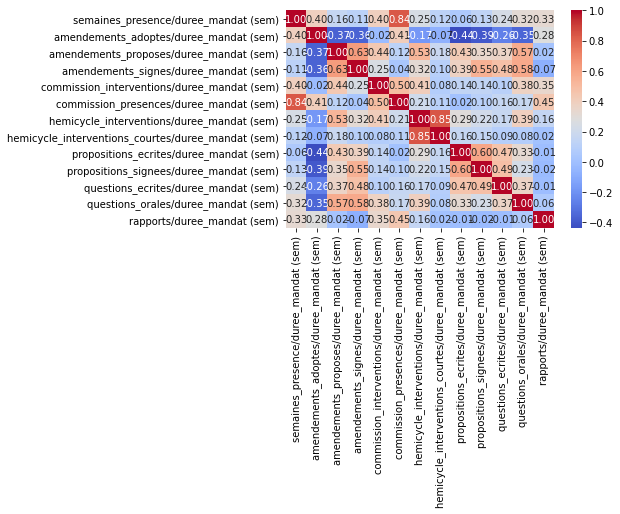

In [21]:
df3 = tab_final.loc[:, [
 'semaines_presence/duree_mandat (sem)',
 'amendements_adoptes/duree_mandat (sem)',
 'amendements_proposes/duree_mandat (sem)',
 'amendements_signes/duree_mandat (sem)',
 'commission_interventions/duree_mandat (sem)',
 'commission_presences/duree_mandat (sem)',
 'hemicycle_interventions/duree_mandat (sem)',
 'hemicycle_interventions_courtes/duree_mandat (sem)',
 'propositions_ecrites/duree_mandat (sem)',
 'propositions_signees/duree_mandat (sem)',
 'questions_ecrites/duree_mandat (sem)',
 'questions_orales/duree_mandat (sem)',
 'rapports/duree_mandat (sem)',]]

sns.heatmap(df3.corr(), cmap='coolwarm', annot=True, fmt=".2f")
df3.corr()